In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_dataset (1).csv to processed_dataset (1).csv


In [ ]:
# Load the dataset (ensure correct file path)
df = pd.read_csv("processed_dataset (1).csv")

# Display basic information
print(df.info())
print(df.head())  # View the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  float64
 2   Respiratory Rate          200020 non-null  float64
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  int64  
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [ ]:
#Features used for the prediction
features = ["Heart Rate", "Respiratory Rate", "Body Temperature", "Oxygen Saturation",
            "Systolic Blood Pressure", "Diastolic Blood Pressure"]

X = df[features]
# Actual class label
y = df["Risk Category"]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset (80% train, 20% test) with stratification to keep anomaly ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# print(y_train)

In [ ]:
# Keep only normal instances in training
X_train = X_train[y_train == 0]

In [ ]:
# Train One-Class SVM model
oc_svm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.05)
oc_svm.fit(X_train)

OneClassSVM(gamma='auto', nu=0.05)

In [ ]:
# Normalize test data using the same scaler
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Predict anomalies
y_pred = oc_svm.predict(X_test_scaled)

In [ ]:
# Convert One-Class SVM output: (1 = Normal, -1 = Anomaly)
y_pred = np.where(y_pred == 1, 0, 1)

In [ ]:
# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[17976  1005]
 [17748  3275]]


In [ ]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))


Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


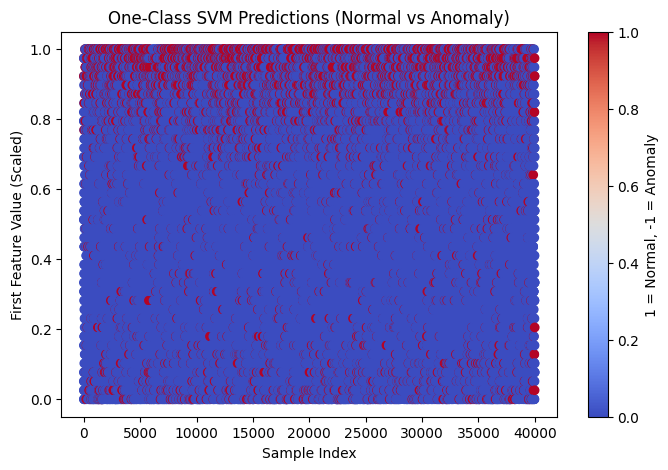

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(X_test_scaled)), X_test_scaled[:, 0], c=y_pred, cmap="coolwarm")
plt.xlabel("Sample Index")
plt.ylabel("First Feature Value (Scaled)")
plt.title("One-Class SVM Predictions (Normal vs Anomaly)")
plt.colorbar(label="1 = Normal, -1 = Anomaly")
plt.show()

In [ ]:
# Calculate accuracy
correct_predictions = (y_test == y_pred).sum()  # Correctly classified samples
total_predictions = len(y_test)  # Total test samples
accuracy = (correct_predictions / total_predictions) * 100  # Convert to percentage

# Print the result
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 53.12%
